In [1]:
# default_exp analyses

# Benchmark Recall Phenomena

Work such as Kahana (2020) and Morton & Polyn, 2016 identify a few benchmark recall phenomena characterizing patterns in the way people typically perform free (and serial) recall, including

1. Recall probability as a function of serial position
2. Probability of starting recall with each serial position
3. Conditional response probability as a function of lag

We'll demo these in this notebook, constructing functions for data in the long table format [recommended by the psifr toolbox](https://psifr.readthedocs.io/en/latest/guide/import.html). While the psifr library includes its own set of functions for visualizing these curves, we usually default to using the library to extract dataframes containing relevant statistics and creating the visualizations ourselves.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading Data
For our demonstrations, we'll lean on the MurdockOkada1970 Dataset. As a reminder, in this dataset each of 72 undergraduates was given 20 test lists with 20-word lists visually presented at either 60 or 120 words/min.

In [3]:
from compmemlearn.datasets import prepare_murdock1970_data

trials, events, list_length = prepare_murdock1970_data('../../data/mo1970.txt')
events.head()

,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,1,1,1,NaN,True,False,0,False
1,1,1,2,2,NaN,True,False,0,False
2,1,1,3,3,NaN,True,False,0,False
3,1,1,4,4,NaN,True,False,0,False
4,1,1,5,5,NaN,True,False,0,False


## Serial Position Curve

In [4]:
spc = events.query('study').pivot_table(
    index=['subject', 'input'], values=['recall']).reset_index()
spc.reset_index(level=0, inplace=True)
spc.head()

,index,subject,input,recall
0,0,1,1,0.40
1,1,1,2,0.10
2,2,1,3,0.25
3,3,1,4,0.30
4,4,1,5,0.10


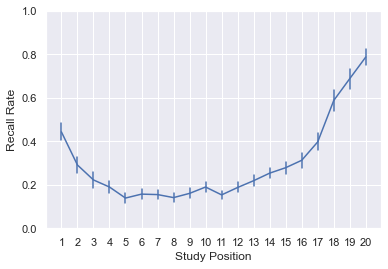

In [5]:
sns.set(style='darkgrid')

g = sns.lineplot(data=spc, x='input', y='recall', err_style='bars')

plt.xlabel('Study Position')
plt.ylabel('Recall Rate')
plt.xticks(np.arange(1, 21), np.arange(1, 21))
g.set(ylim=(0, 1))
plt.show()

If we want, we can draw a unique SPC for each subject in our dataset too:

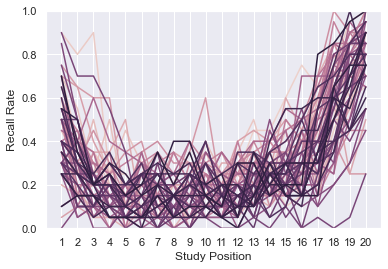

In [6]:
sns.set(style='darkgrid')

g = sns.lineplot(data=spc, x='input', y='recall', hue='subject', err_style='bars', legend=False)

plt.xlabel('Study Position')
plt.ylabel('Recall Rate')
plt.xticks(np.arange(1, 21), np.arange(1, 21))
g.set(ylim=(0, 1))
plt.show()

## Lag CRP Curve

In [7]:
from psifr import fr

lag_crp = fr.lag_crp(events)
lag_crp.head()

prob  actual  possible
subject lag                            
1       -19  0.166667       2        12
        -18  0.083333       2        24
        -17  0.025641       1        39
        -16  0.019608       1        51
        -15  0.030303       2        66

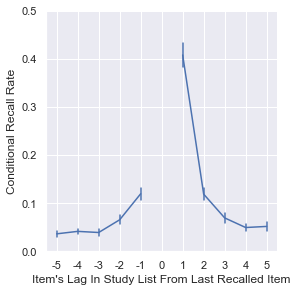

In [8]:
sns.set_theme(style="darkgrid")

max_lag = 5
filt_neg = f'{-max_lag} <= lag < 0'
filt_pos = f'0 < lag <= {max_lag}'

g = sns.FacetGrid(lag_crp, height=4)
g.map_dataframe(
    lambda data, **kws: sns.lineplot(
        data=data.query(filt_neg), x='lag', y='prob', err_style='bars', **kws)
)
g.map_dataframe(
    lambda data, **kws: sns.lineplot(
        data=data.query(filt_pos), x='lag', y='prob', err_style='bars', **kws)
)

plt.xlabel('Item\'s Lag In Study List From Last Recalled Item')
plt.ylabel('Conditional Recall Rate')
plt.xticks(np.arange(-5, 6, 1), np.arange(-5, 6, 1))

g.set(ylim=(0, .5))
plt.show()

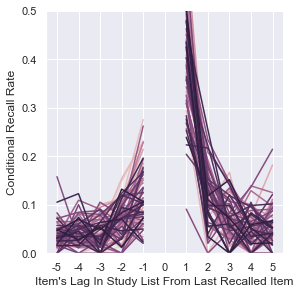

In [9]:
sns.set_theme(style="darkgrid")

max_lag = 5
filt_neg = f'{-max_lag} <= lag < 0'
filt_pos = f'0 < lag <= {max_lag}'

g = sns.FacetGrid(lag_crp, height=4)
g.map_dataframe(
    lambda data, **kws: sns.lineplot(
        data=data.query(filt_neg), x='lag', y='prob', hue='subject', err_style='bars', **kws)
)
g.map_dataframe(
    lambda data, **kws: sns.lineplot(
        data=data.query(filt_pos), x='lag', y='prob', hue='subject', err_style='bars', **kws)
)

plt.xlabel('Item\'s Lag In Study List From Last Recalled Item')
plt.ylabel('Conditional Recall Rate')
plt.xticks(np.arange(-5, 6, 1), np.arange(-5, 6, 1))

g.set(ylim=(0, .5))
plt.show()

## Probability of First Recall by Serial Position

In [10]:
pfr = fr.pnr(events).query('output <= 1').reset_index()
pfr.head()

,subject,output,input,prob,actual,possible
0,1,1,1,0.0,0,20
1,1,1,2,0.0,0,20
2,1,1,3,0.0,0,20
3,1,1,4,0.0,0,20
4,1,1,5,0.0,0,20


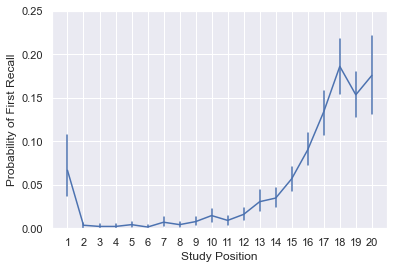

In [11]:
sns.set(style='darkgrid')

g = sns.lineplot(data=pfr, x='input', y='prob', err_style='bars')

plt.xlabel('Study Position')
plt.ylabel('Probability of First Recall')
plt.xticks(np.arange(1, 21), np.arange(1, 21))
g.set(ylim=(0, .25))
plt.show()

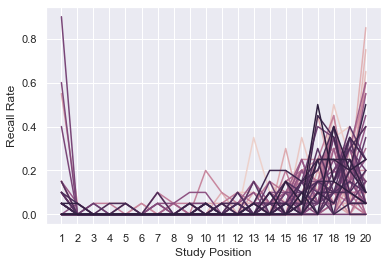

In [12]:
sns.set(style='darkgrid')

g = sns.lineplot(data=pfr, x='input', y='prob', hue='subject', err_style='bars', legend=False)

plt.xlabel('Study Position')
plt.ylabel('Recall Rate')
plt.xticks(np.arange(1, 21), np.arange(1, 21))
plt.show()


## Combined Summary Plot
We usually present these together in one figure. `matplotlib`'s subplots function handles this reasonably well.

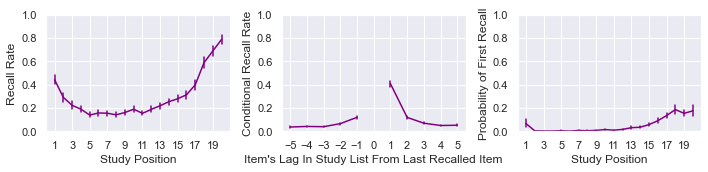

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5), sharey=False)

# serial position curve
sns.lineplot(ax=axes[0], data=spc, x='input', y='recall', err_style='bars', color='purple')
axes[0].set(xlabel='Study Position', ylabel='Recall Rate')
axes[0].set_xticks(np.arange(1, 21, 2))
axes[0].set_ylim((0, 1))

# lag crp curve
sns.lineplot(data=lag_crp.query(filt_neg), x='lag', y='prob', err_style='bars', ax=axes[1], color='purple')
sns.lineplot(data=lag_crp.query(filt_pos), x='lag', y='prob', err_style='bars', ax=axes[1], color='purple')
axes[1].set(xlabel='Item\'s Lag In Study List From Last Recalled Item', ylabel='Conditional Recall Rate')
axes[1].set_xticks(np.arange(-5, 6, 1))
axes[1].set_ylim((0, 1))

# pfr
sns.lineplot(data=pfr, x='input', y='prob', err_style='bars', legend=False, ax=axes[2], color='purple')
axes[2].set(xlabel='Study Position', ylabel='Probability of First Recall')
axes[2].set_xticks(np.arange(1, 21, 2))
axes[2].set_ylim((0, 1))

plt.tight_layout()
plt.show()